## Importing Data Notebook

Code sources:
- https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python/blob/master/Geopandas_Intro_F2019_GC.ipynb
- https://rasterio.readthedocs.io/en/stable/

In [3]:
## Windows or Mac?
op_system = 'Windows'

In [4]:
# Create an object containing the file path to a master folder with the following folders:
    # code
        # 1_importing (This import notebook should be within this sub-folder)
        # 2_cleaning
        # 3_processing
        # 4_exploration
        # 5_analysis
        # 6_output
    # data
        # raw_data
        # processed_data
        
# Set the object `master` to your local file path of the master folder
master = 'C:\\Users\\theaa\\Desktop\\Data Science Pedagogy Resources\\Python\\Human_Mobility_Project\\Human_Mobility_Project'
# master = '/Users/katewetstone/Desktop/CYPLAN 257 Data Science Human Mobility/Human_Mobility_Project'

## Installing and Importing Geopandas

Geopandas works for vector data. For raster data, use rasterio (see next section).

First, install Homebrew so that the `!brew install spatialindex` command  works. `spatialindex` is a dependency of `rtree`, which is a dependency of `geopandas`. To install Homebrew open a new Terminal window and enter the following command:

`!ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" < /dev/null 2> /dev/null`

When it prompts for your password, type in your computer's password and press Enter. Your password won't show up typed onto the screen but is still being entered.

Install libraries:

In [5]:
# Install os
if op_system == 'Windows' :
    !pip install os

# Install zipfile
if op_system == 'Windows' :
    !pip install zipfile

# Install wget
!pip install wget
# Install pysal
!pip install pysal
# Install mapclassify
!pip install mapclassify

# Install Geopandas dependencies
!pip install fiona 
!pip install shapely 
!pip install pyproj 
!brew install spatialindex # dependency of rtree
!pip install rtree

# Install Geopandas
!pip install geopandas
# Install descartes - Geopandas requirement
!pip install descartes

Invalid requirement: '#'

Invalid requirement: '#'



'brew' is not recognized as an internal or external command,
operable program or batch file.


Geopandas can also be installed directly from github. This still requires installing geopandas dependencies separately (`pandas fiona shapely pyproj rtree`)

To install directly from github: `!pip install git+git://github.com/geopandas/geopandas.git`

Import libraries:

In [6]:
# Import os and zipfile for Windows
if op_system == 'Windows' :
    import os
    import zipfile

# Import wget    
import wget

# geopandas dependencies
import pandas as pd
import fiona 
import shapely
import pyproj
import rtree

# Import geopandas, mapclassify, and matplotlib
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
from matplotlib import pyplot

## Installing and Importing Rasterio

References: 
- https://rasterio.readthedocs.io/en/stable/
- https://rasterio.readthedocs.io/en/stable/quickstart.html#reading-raster-data

Note that geopandas only works for vector data.

In [7]:
if op_system == 'Mac' :
    !pip install rasterio

In [8]:
if op_system == 'Windows' :
    !conda config --add channels conda-forge
    !conda install rasterio

Solving environment: ...working... done

# All requested packages already installed.



In [9]:
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.mask

## Fetch and Unzip Raw Data

Fetch data files with `wget`

In [10]:
# Set our current directory to the master folder
os.chdir(master)

Save the files as an object list `myfiles`

In [11]:
myfiles = ('TravelTime_50k.zip', 
           'World_Country_Borders.zip', 
           'PovMap_Global_Infant_Mortality.zip', 
           'val_prod.zip')

In [12]:
data_path = 'data/raw_data'

In [13]:
prefix = 'https://github.com/AaronScherf/Human_Mobility_Project/blob/master/data/raw_data/'

for f in myfiles:
    wget.download(prefix+f, out = data_path)

Unzip the data files

In [14]:
if op_system == 'Mac' :
    for f in myfiles: # works for Macs but not Windows
        print("Unzipping: ", f)
        !unzip {f}

In [15]:
if op_system == 'Windows' :
    for f in myfiles:
        with zipfile.ZipFile(data_path+'/'+f, 'r') as zip_ref:
            zip_ref.extractall(data_path)

## Reading in Vector Data with GeoPandas

Import the shapefile for country borders. Steps needed:
1. Import shapefile (done)
2. Change the bounds to only include southern Africa (to do)

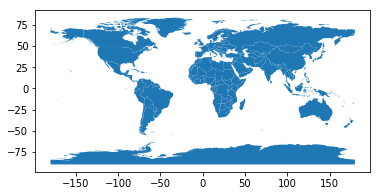

In [16]:
# read in borders shapefile
country_borders = gpd.read_file(data_path+'/'+
                                'World_Country_Borders/ne_50m_admin_0_countries.shp') 
# visualize country borders
country_borders.plot()

In [17]:
print("Country Borders CRS", country_borders.crs)

Country Borders CRS {'init': 'epsg:4326'}


In [18]:
southern_africa_countries = ('South Africa', 
                             'Angola', 
                             'Botswana',
                             'Lesotho',
                             'eSwatini',
                             'Namibia',
                             'United Republic of Tanzania',
                             'Zambia',
                             'Zimbabwe',
                             'Madagascar',
                             'Democratic Republic of the Congo',
                             'Mozambique',
                             'Malawi'
                            )

sum(country_borders['ADMIN'].isin(southern_africa_countries)) == len(southern_africa_countries)

True

In [19]:
southern_africa_borders = country_borders[country_borders['ADMIN'].isin(southern_africa_countries)]

In [20]:
southern_africa_borders.bounds

,minx,miny,maxx,maxy
0,25.224023,-22.402051,33.006738,-15.643066
1,21.978906,-18.041504,33.661523,-8.193652
43,29.323438,-11.716211,40.463574,-0.994922
49,30.787500,-27.309961,32.112891,-25.742969
56,16.447559,-46.962891,37.887695,-22.146289
101,11.721680,-28.938770,25.258789,-16.967676
102,30.221777,-26.861621,40.844531,-10.464355
116,32.670410,-17.131055,35.892773,-9.395020
117,43.257129,-25.570508,50.482715,-12.079590
124,27.051758,-30.642285,29.390723,-28.581738


In [21]:
max_lat = max(southern_africa_borders.bounds['maxx']) # right bound
min_lat = min(southern_africa_borders.bounds['minx']) # left bound
max_long = max(southern_africa_borders.bounds['maxy']) # top bound
min_long = min(southern_africa_borders.bounds['miny']) # bottom bound

In [22]:
southern_africa_box = shapely.geometry.box(min_lat, min_long, max_lat, max_long, ccw=True)

In [23]:
# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

# Write a new Shapefile
with fiona.open('data/raw_data/border_box.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(southern_africa_box),
        'properties': {'id': 123},
    })

## Read in Raster Data with Rasterio

Read in the data for variables to use in the principal component analysis.

In [24]:
travel_time_path = data_path+'/'+'TravelTime_50k/Traveltime_50k.tif'
infant_mort_path = data_path+'/'+'PovMap_Global_Infant_Mortality/povmap_global_subnational_infant_mortality_rates_v2.tif'
val_prod_path = data_path+'/'+'val_prod.tif'
val_prod_per_hect_path = data_path+'/'+'val_prod_per_ha.tif'
raster_data_paths = [travel_time_path, infant_mort_path, val_prod_path, val_prod_per_hect_path]

In [25]:
travel_time = rasterio.open(travel_time_path)
infant_mort = rasterio.open(infant_mort_path)
val_prod = rasterio.open(val_prod_path)
val_prod_per_hect = rasterio.open(val_prod_per_hect_path)
raster_data = [travel_time, infant_mort, val_prod, val_prod_per_hect]

Next step: use dataset.transform to map pixel locations. See https://rasterio.readthedocs.io/en/stable/quickstart.html#reading-raster-data

All datasets for PCA should use the same coordinate reference system, `EPSG:4326`.

In [32]:
pca_datasets = [travel_time, infant_mort, val_prod, val_prod_per_hect]

def check_crs(datasets, crs='EPSG:4326'):
    # Checks that all datasets use the same coordinate reference system
    # Returns true if all datasets use the crs specified
    check = True
    for dataset in datasets:
        if dataset.crs != crs:
            print(dataset.name, dataset.crs)
            check = False
    return check

check_crs(pca_datasets)

True

### Masking the Outline of Southern Africa from Raster files using Shapefile Boundaries

Code Source: 
Clipping Shapefile Vectors - https://www.earthdatascience.org/courses/earth-analytics-python/spatial-data-vector-shapefiles/clip-vector-data-in-python-geopandas-shapely/
Masking Rasters using Vector Geometry - https://rasterio.readthedocs.io/en/stable/topics/masking-by-shapefile.html

In [49]:
for raster in raster_data_paths:

    with fiona.open("data/raw_data/border_box.shp", "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(raster) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
    
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rasterio.open(str(raster[:-4]) + '_mask.tif', "w", **out_meta) as dest:
        dest.write(out_image)

In [53]:
travel_time_masked = rasterio.open(travel_time_path[:-4] + '_mask.tif')
infant_mort_masked = rasterio.open(infant_mort_path[:-4] + '_mask.tif')
val_prod_masked = rasterio.open(val_prod_path[:-4] + '_mask.tif')
val_prod_per_hect_masked = rasterio.open(val_prod_per_hect_path[:-4] + '_mask.tif')
raster_data_masked = [travel_time_masked, infant_mort_masked, val_prod_masked, val_prod_per_hect_masked]

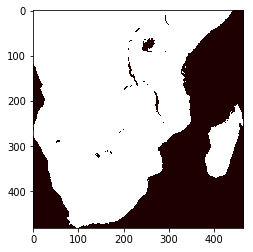

In [54]:
pyplot.imshow(travel_time_masked.read(1), cmap='pink')

pyplot.show()

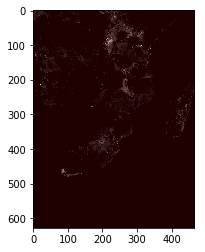

In [56]:
pyplot.imshow(val_prod_masked.read(1), cmap='pink')

pyplot.show()

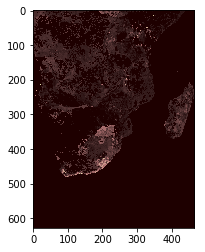

In [57]:
pyplot.imshow(val_prod_per_hect_masked.read(1), cmap='pink')

pyplot.show()

In [58]:
# check each dataset's upper left and lower right coordinates
# these coordinates are meters from the origin of the coordinate system
for dataset in raster_data_masked:
    print(str(dataset.name))
    print(dataset.transform*(0,0))
    print(dataset.transform*(dataset.width, dataset.height))
# FLAG: the bounds are not the same for each dataset. 

data/raw_data/TravelTime_50k/Traveltime_50k_mask.tif
(11.666666666988416, 5.3333333332066)
(50.5000000003062, -34.833333333444)
data/raw_data/PovMap_Global_Infant_Mortality/povmap_global_subnational_infant_mortality_rates_v2_mask.tif
(11.716666666666612, 5.318778284000032)
(50.48333333333326, -46.96455504933328)
data/raw_data/val_prod_mask.tif
(11.665900000000022, 5.333671999999993)
(50.499078000000026, -46.99945200000001)
data/raw_data/val_prod_per_ha_mask.tif
(11.665900000000022, 5.333671999999993)
(50.499078000000026, -46.99945200000001)


In [21]:
with rasterio.open(data_path+'/TravelTime_50k/Traveltime_50k.tif') as data_set:

    # Read the dataset's valid data mask as a ndarray.
    mask = data_set.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=data_set.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            data_set.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[37.25, 21.083333], [37.25, 21.0], [37.333333, 21.0], [37.333333, 21.083333], [37.25, 21.083333]]]}
{'type': 'Polygon', 'coordinates': [[[-17.083333, 21.0], [-17.083333, 20.916667], [-17.0, 20.916667], [-17.0, 21.0], [-17.083333, 21.0]]]}
{'type': 'Polygon', 'coordinates': [[[-16.333333, 19.583333], [-16.333333, 19.5], [-16.25, 19.5], [-16.25, 19.583333], [-16.333333, 19.583333]]]}
{'type': 'Polygon', 'coordinates': [[[6.0, 19.083333], [6.0, 19.0], [6.083333, 19.0], [6.083333, 19.083333], [6.0, 19.083333]]]}
{'type': 'Polygon', 'coordinates': [[[6.5, 18.25], [6.5, 18.166667], [6.583333, 18.166667], [6.583333, 18.25], [6.5, 18.25]]]}
{'type': 'Polygon', 'coordinates': [[[6.666667, 18.25], [6.666667, 18.166667], [6.75, 18.166667], [6.75, 18.25], [6.666667, 18.25]]]}
{'type': 'Polygon', 'coordinates': [[[6.25, 18.166667], [6.25, 18.083333], [6.333333, 18.083333], [6.333333, 18.166667], [6.25, 18.166667]]]}
{'type': 'Polygon', 'coordinates': [[[6.333333

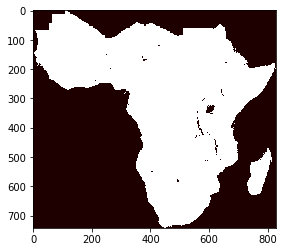

In [34]:
pyplot.imshow(travel_time.read(1), cmap='pink')

pyplot.show()

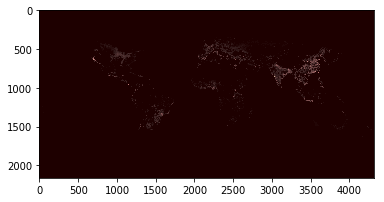

In [33]:
pyplot.imshow(val_prod.read(1), cmap='pink')

pyplot.show()